In [1]:
import corning_glass as corning_glass
import Pt_111 as Pt_111
import Ni_111 as Ni_111
import Ta_111 as Ta_111
import udkm1Dsim as ud
import matplotlib.pyplot as plt
import numpy as np

u = ud.u
u.setup_matplotlib()

Pt = Pt_111.Pt_111_2TM()

Ni = Ni_111.Ni_111_2TM()

Ta = Ta_111.Ta_111_2TM()

glass = corning_glass.corning_glass_2TM()

Number of subsystems changed from 1 to 2.
Number of subsystems changed from 1 to 2.
Number of subsystems changed from 1 to 2.
Number of subsystems changed from 1 to 2.
Number of subsystems changed from 1 to 2.


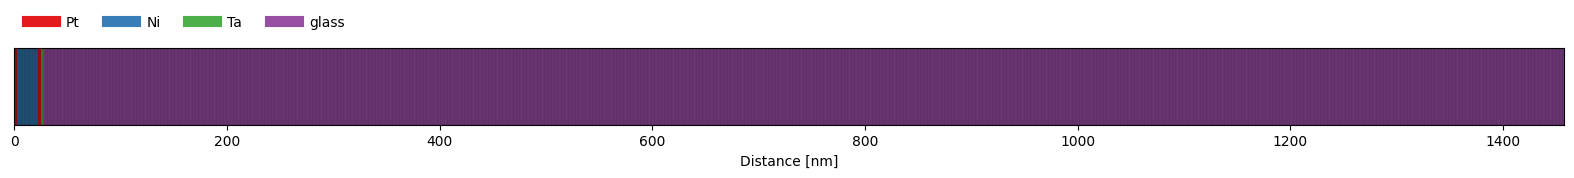

Structure properties:

Name   : Ni_20_back
Thickness : 1457.7988 nanometer
Roughness : 0.0000 nanometer
----
9 times Pt: 2.0390 nanometer
98 times Ni: 19.9430 nanometer
14 times Pt: 3.1718 nanometer
11 times Ta: 3.1449 nanometer
5000 times corning_glass: 1429.5000 nanometer
----
no substrate



In [2]:
sample_name = 'Ni_20_back'


layers = ['Pt', 'Ni', 'Pt', 'Ta', 'glass']
sample_dic = {'Pt': Pt, 'Ni': Ni, 'Pt': Pt, 'Ta': Ta, 'glass': glass}
properties = {'Pt': {'C': Pt.prop['heat_capacity']},
              'Ni': {'C': Ni.prop['heat_capacity']},
              'Pt': {'C': Pt.prop['heat_capacity']},
              'Ta': {'C': Ta.prop['heat_capacity']},
              'glass': {'C': glass.prop['heat_capacity']}}

# Possible Excitation Conditions of Simulation
angle_list = [(90)*u.deg]
peak_list = ['Ni']

# Simulation Model
static_exp = False

# Simulation Parameters
num_unit_cell = [9, 98, 14, 11, 5000]
# num_unit_cell = [29, 455, 108, 28, 4000]
# num_unit_cell = [29, 455, 108, 28, 1000]

# Analysis and Export
export_name = r'1000ps_strain_pulse_MOKE_fluence'
z_max_export = 100

# %%
plotting_sim = [True, True, True, True, False]
color_list = ['orange', 'gray', 'orange', 'black', 'blue']
data_list = [0, 0, 0, 0, 0]

# %%

''' Build the sample structure from the initialized unit cells '''
# %%

for l in range(len(layers)):
    prop_uni_cell = {}
    prop_uni_cell['a_axis'] = sample_dic[layers[l]].prop['a_axis']
    prop_uni_cell['b_axis'] = sample_dic[layers[l]].prop['b_axis']
    prop_uni_cell['sound_vel'] = sample_dic[layers[l]].prop['sound_vel']
    prop_uni_cell['lin_therm_exp'] = sample_dic[layers[l]].prop['lin_therm_exp']
    prop_uni_cell['heat_capacity'] = sample_dic[layers[l]].prop['heat_capacity']
    prop_uni_cell['therm_cond'] = sample_dic[layers[l]].prop['therm_cond']
    prop_uni_cell['sub_system_coupling'] = sample_dic[layers[l]].prop['sub_system_coupling']
    prop_uni_cell['opt_pen_depth'] = sample_dic[layers[l]].prop['opt_pen_depth']
    prop_uni_cell['opt_ref_index'] = sample_dic[layers[l]].prop['opt_ref_index']
    prop_uni_cell['phonon_damping'] = sample_dic[layers[l]].prop['phonon_damping']

    if l == 1:
        prop_uni_cell['eff_spin'] = 0.5
        prop_uni_cell['curie_temp'] = 630*u.K
        prop_uni_cell['lamda'] = 0.08
        prop_uni_cell['mag_moment'] = 0.393*u.bohr_magneton
        prop_uni_cell['aniso_exponent'] = 3
        prop_uni_cell['anisotropy'] = [-500, 0., 7.72e4]*u.J/u.m**3
        prop_uni_cell['exch_stiffness'] = [0e-15, 0e-15, 0e-15]*u.J/u.m
        prop_uni_cell['mag_saturation'] = 4e5*u.J/u.T/u.m**3



    properties[layers[l]]['unit_cell'] = sample_dic[layers[l]].createUnitCell(
        layers[l], sample_dic[layers[l]].prop['c_axis'], prop_uni_cell)
    
# Add magnetic properties


S = ud.Structure(sample_name)
for l in range(len(layers)):
    S.add_sub_structure(properties[layers[l]]['unit_cell'], num_unit_cell[l])
S.visualize()
print(S)

Heat simulation properties:

This is the current structure for the simulations:

Structure properties:

Name   : Ni_20_back
Thickness : 1457.7988 nanometer
Roughness : 0.0000 nanometer
----
9 times Pt: 2.0390 nanometer
98 times Ni: 19.9430 nanometer
14 times Pt: 3.1718 nanometer
11 times Ta: 3.1449 nanometer
5000 times corning_glass: 1429.5000 nanometer
----
no substrate


Display properties:

================================  =======================================================
                       parameter  value
================================  =======================================================
                    force recalc  False
                 cache directory  ./
                display messages  True
                       save data  True
                    progress bar  True
              excitation fluence  [2.5] mJ/cm²
                excitation delay  [0.0] ps
         excitation pulse length  [0.1] ps
           excitation wavelength  800.0 nm
             

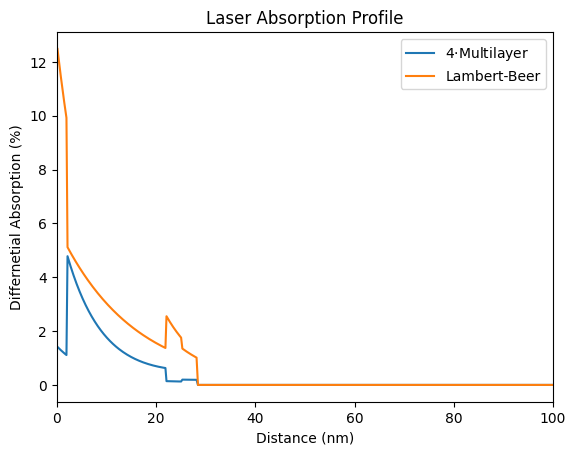

_temp_map_ loaded from file:
	temp_map_1c70ced582fe988d7937d0fb844c2432_741ede884a01bd93de0b18d73d5cb77e.npz


In [3]:
h = ud.Heat(S, False)

h.save_data = False
h.disp_messages = True

# Simulated Excitation Conditions
peak_meas = 'Ni'
fluenz_sim = [2.5]*u.mJ/u.cm**2
puls_width = [0.1]*u.ps
pump_delay = [0]*u.ps
multi_abs = True
init_temp = 300
heat_diff = True
delays = np.r_[-50:-2:0.5,-2:10:0.05, 10:1000:0.05]*u.ps
_, _, distances = S.get_distances_of_layers()

for l in range(len(layers)):
    properties[layers[l]]['num_unit_cell'] = num_unit_cell[l]
    properties[layers[l]]['density'] = properties[layers[l]]['unit_cell'].density
    properties[layers[l]]['select_layer'] = S.get_all_positions_per_unique_layer()[layers[l]]
    properties[layers[l]]['thick_layer'] = properties[layers[l]
                                                      ]['num_unit_cell']*properties[layers[l]]['unit_cell'].c_axis

# %%
    
''' Determine the optical absorption from the excitation conditions '''

# %% Get the absorption

h = ud.Heat(S, False)
h.excitation = {'fluence': fluenz_sim, 'delay_pump': pump_delay, 'pulse_width': puls_width, 'backside': True,
                'multilayer_absorption': multi_abs, 'wavelength': 800*u.nm, 'theta': angle_list[peak_list.index(peak_meas)]}
#h.save_data = True
h.disp_messages = True
h.heat_diffusion = heat_diff
h.boundary_conditions = {'top_type': 'isolator', 'bottom_type': 'isolator'}

Init_temp = np.ones([S.get_number_of_layers(), 2])
Init_temp[:, 0] = init_temp
Init_temp[:, 1] = init_temp
print(h)



dAdzLB = h.get_Lambert_Beer_absorption_profile()
dAdz, _, _, _ = h.get_multilayers_absorption_profile()

plt.figure()
plt.plot(distances.to('nm'), 4*dAdz*1e-9*1e2, label=r'4$\cdot$Multilayer')
plt.plot(distances.to('nm'), dAdzLB*1e-9*1e2, label=r'Lambert-Beer')
plt.xlim(0, 100)
plt.legend()
plt.xlabel('Distance (nm)')
plt.ylabel('Differnetial Absorption (%)')
plt.title('Laser Absorption Profile')
plt.show()

temp_map, delta_temp_map = h.get_temp_map(delays, Init_temp)

In [4]:
# plt.figure(figsize=[6, 5])
# plt.subplot(1, 1, 1)
# plt.pcolormesh(distances.to('nm').magnitude, delays.to('ps').magnitude, temp_map[:, :, 1],
#                shading='auto', cmap='RdBu_r', vmin=np.min(temp_map[:, :, 1]), vmax=np.max(temp_map[:, :, 1]))
# plt.colorbar()
# plt.xlim(0, 140)
# plt.xlabel('Distance (nm)')
# plt.ylabel('Delay (ps)')
# plt.title('Phonon')
# plt.tight_layout()
# plt.show()

# plt.figure(figsize=[6, 5])
# plt.subplot(1, 1, 1)
# plt.pcolormesh(distances.to('nm').magnitude, delays.to('ps').magnitude, temp_map[:, :, 0],
#                shading='auto', cmap='RdBu_r', vmin=np.min(temp_map[:, :, 0]), vmax=np.max(temp_map[:, :, 0]))
# plt.colorbar()
# plt.xlim(0, 140)
# plt.ylim(-0.2, 2)
# plt.xlabel('Distance (nm)')
# plt.ylabel('Delay (ps)')
# plt.title('Electron')
# plt.tight_layout()
# plt.show()


In [5]:
pnum = ud.PhononNum(S, False, only_heat=False)
pnum.save_data = True
pnum.disp_messages = True

ind_trim = np.where(delays>-15*u.ps)[0]


strain_map = pnum.get_strain_map(delays, temp_map, delta_temp_map)

# plt.figure(figsize=[6, 0.68*6])
# plt.pcolormesh(distances.to('nm').magnitude, delays[ind_trim].to('ps').magnitude, 1e3*strain_map[ind_trim,:], shading='auto',
#                cmap='RdBu_r', vmin=-0.7*np.max(1e3*strain_map), vmax=0.7*np.max(1e3*strain_map))
# plt.colorbar()
# plt.xlim(0, 140)
# plt.ylim(-2, 20)
# plt.xlabel('Distance (nm)')
# plt.ylabel('Delay (ps)')
# plt.title(r'Strain Map ($10^{-3}$)')
# plt.tight_layout()
# plt.show()

_strain_map_ loaded from file:
	strain_map_num_e957a3d968320dcf473d381f420645f1_5b02a8f3fe6afcacf73e2f672a92af26.npz


## LLG simulation

In [6]:
init_mag = np.array([1.0, (0.*u.deg).to('rad').magnitude, (0*u.deg).to('rad').magnitude])



init_mag_0 = np.array([1.0, (0.*u.deg).to('rad').magnitude, (0*u.deg).to('rad').magnitude])

delays_init = np.linspace(-12000,0,len(delays))*u.ps
temp_map_init = np.zeros_like(temp_map)+300
strain_map_init = np.zeros_like(strain_map)

llb = ud.LLB(S, False)

llb.save_data =True
llb.disp_messages = True

H_amp = 0.38
phi = np.deg2rad(10)

magnetization_map_init_LLB = llb.get_magnetization_map(delays_init, temp_map=temp_map_init,strain_map=strain_map_init, init_mag=init_mag_0,
                                              H_ext=np.array([H_amp*np.sin(phi), 0, H_amp*np.cos(phi)]), simulation_type='LLG')

init_mag = np.array([np.mean(magnetization_map_init_LLB[-1, 9:107, 0]),np.mean(magnetization_map_init_LLB[-1, 9:107, 1]),np.mean(magnetization_map_init_LLB[-1, 9:107, 2])])
print(init_mag)


magnetization_map = llb.get_magnetization_map(delays, temp_map=temp_map,strain_map=2*strain_map, init_mag=init_mag,
                                              H_ext=np.array([H_amp*np.sin(phi), 0, H_amp*np.cos(phi)]), simulation_type='LLG')

# plt.figure(figsize=[6,8])
# plt.subplot(2,1,1)
# plt.plot(delays[ind_trim], np.mean(magnetization_map[ind_trim, 9:107, 0], axis=1), label=r'$A$')
# plt.legend()
# plt.xlabel('Delay (ps)')
# plt.ylabel('Magnetization')
# plt.subplot(2,1,2)
# plt.plot(delays[ind_trim], (np.mean(magnetization_map[ind_trim, 9:107, 1], axis=1)*u.rad).to('deg'), label=r'$\phi$')
# plt.plot(delays[ind_trim], (np.mean(magnetization_map[ind_trim, 9:107, 2], axis=1)*u.rad).to('deg'), label=r'$\gamma$')
# plt.legend()
# plt.xlabel('Delay (ps)')
# plt.ylabel('Magnetization')
# plt.show()

_magnetization_map_ loaded from file:
	magnetization_map_c3a45ceaeb4d0d3bff24c8f60851a64b_13f49f5569527d918ee2eca2932249b0.npz
[9.65265349e-01 6.52372874e-01 4.78143721e-07]
_magnetization_map_ loaded from file:
	magnetization_map_c3a45ceaeb4d0d3bff24c8f60851a64b_92e41cf4206b4996a111e633a567f89d.npz


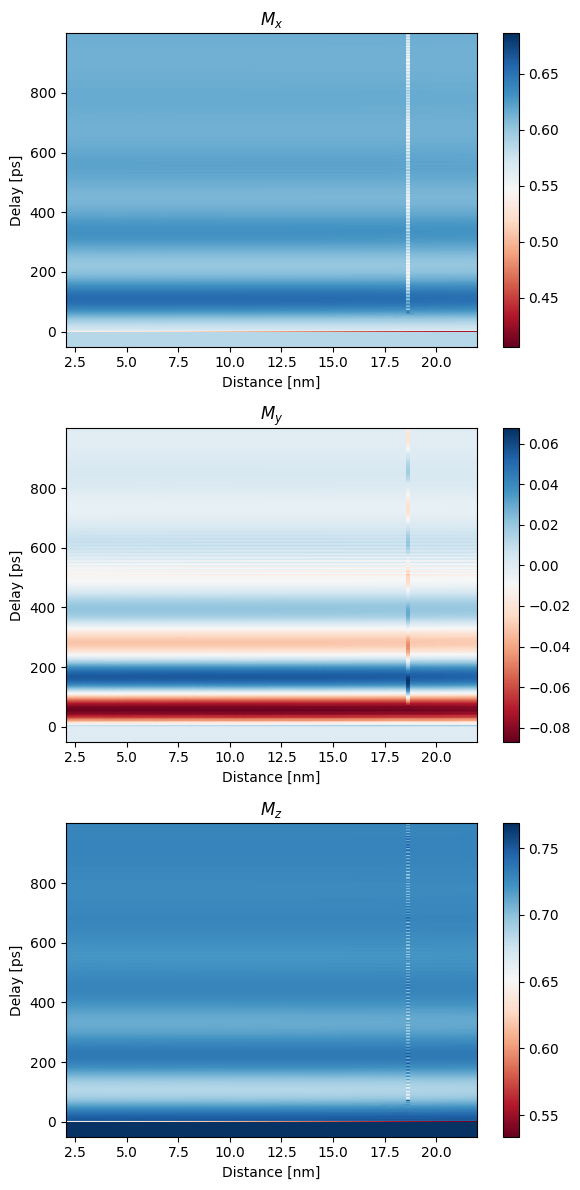

In [7]:
ind_trim = np.where(delays>-150*u.ps)[0]
magnetization_map_xyz = ud.helpers.convert_polar_to_cartesian(magnetization_map[ind_trim, 9:107, :])
plt.figure(figsize=[6, 12])
plt.subplot(3, 1, 1)
plt.pcolormesh(distances[9:107].to('nm').magnitude, delays[ind_trim].to('ps').magnitude, magnetization_map_xyz[:, :, 0],
               shading='auto', cmap='RdBu')
plt.colorbar()
plt.xlabel('Distance [nm]')
plt.ylabel('Delay [ps]')
plt.title('$M_x$')

#plt.xlim(0,30)

plt.subplot(3, 1, 2)
plt.pcolormesh(distances[9:107].to('nm').magnitude, delays[ind_trim].to('ps').magnitude, magnetization_map_xyz[:, :, 1],
               shading='auto', cmap='RdBu')
plt.colorbar()
plt.xlabel('Distance [nm]')
plt.ylabel('Delay [ps]')
plt.title('$M_y$')

#plt.xlim(0,30)

plt.subplot(3, 1, 3)
plt.pcolormesh(distances[9:107].to('nm').magnitude, delays[ind_trim].to('ps').magnitude, magnetization_map_xyz[:, :, 2],
               shading='auto', cmap='RdBu')
plt.colorbar()
plt.xlabel('Distance [nm]')
plt.ylabel('Delay [ps]')
plt.title('$M_z$')

#plt.xlim(0,30)
plt.tight_layout()
plt.show()

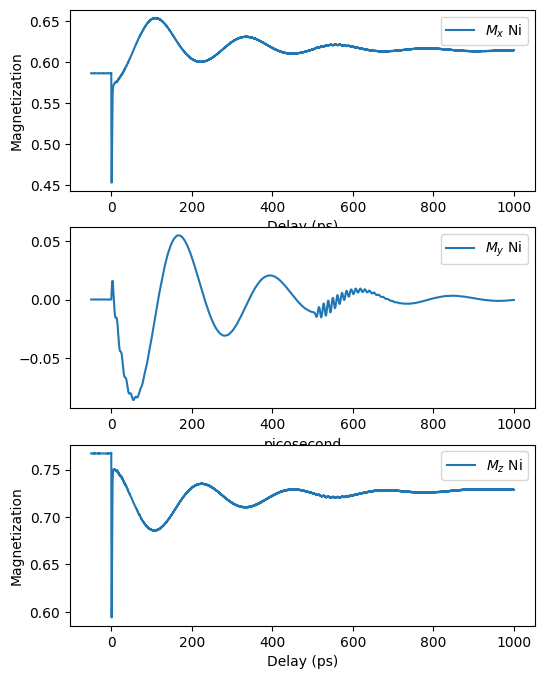

: 

In [8]:


ind_trim = np.where(delays>-150*u.ps)[0]
magnetization_map_xyz = ud.helpers.convert_polar_to_cartesian(magnetization_map[ind_trim, 9:107, :])

plt.figure(figsize=[6,8])
plt.subplot(3,1,1)
plt.plot(delays[ind_trim], np.mean(magnetization_map_xyz[:, :, 0], axis=1), label=r'$M_x$ Ni')
plt.legend()
#plt.xlim(-10,600)
plt.xlabel('Delay (ps)')
plt.ylabel('Magnetization')
plt.subplot(3,1,2)
plt.plot(delays[ind_trim], np.mean(magnetization_map_xyz[:, :, 1], axis=1), label=r'$M_y$ Ni')
plt.legend()
#plt.xlim(-10,600)
plt.subplot(3,1,3)
plt.plot(delays[ind_trim], np.mean(magnetization_map_xyz[:, :, 2], axis=1), label=r'$M_z$ Ni')
plt.legend()
plt.xlabel('Delay (ps)')
plt.ylabel('Magnetization')
#plt.xlim(-10,600)
plt.show()

In [ ]:
magnetization_map = llb.get_magnetization_map(delays, temp_map=temp_map,strain_map=2*strain_map, init_mag=init_mag,
                                              H_ext=np.array([H_amp*np.sin(phi), 0, H_amp*np.cos(phi)]), simulation_type='LLB')

ind_trim = np.where(delays>-150*u.ps)[0]
magnetization_map_LLB_xyz = ud.helpers.convert_polar_to_cartesian(magnetization_map[ind_trim, 9:107, :])
plt.figure(figsize=[6, 12])
plt.subplot(3, 1, 1)
plt.pcolormesh(distances[9:107].to('nm').magnitude, delays[ind_trim].to('ps').magnitude, magnetization_map_LLB_xyz[:, :, 0],
               shading='auto', cmap='RdBu')
plt.colorbar()
plt.xlabel('Distance [nm]')
plt.ylabel('Delay [ps]')
plt.title('$M_x$')

#plt.xlim(0,30)

plt.subplot(3, 1, 2)
plt.pcolormesh(distances[9:107].to('nm').magnitude, delays[ind_trim].to('ps').magnitude, magnetization_map_LLB_xyz[:, :, 1],
               shading='auto', cmap='RdBu')
plt.colorbar()
plt.xlabel('Distance [nm]')
plt.ylabel('Delay [ps]')
plt.title('$M_y$')

#plt.xlim(0,30)

plt.subplot(3, 1, 3)
plt.pcolormesh(distances[9:107].to('nm').magnitude, delays[ind_trim].to('ps').magnitude, magnetization_map_LLB_xyz[:, :, 2],
               shading='auto', cmap='RdBu')
plt.colorbar()
plt.xlabel('Distance [nm]')
plt.ylabel('Delay [ps]')
plt.title('$M_z$')

#plt.xlim(0,30)
plt.tight_layout()
plt.show()

Calculating _magnetization_map_ ...
_mean_field_magnetization_map_ loaded from file:
	mf_magnetization_map_c3a45ceaeb4d0d3bff24c8f60851a64b_b2c0c82929c4cc490d572ed0a5573d9f.npz


0it [00:00, ?it/s]

/home/friweber/udkm1Dsim_LLG-LLB/udkm1Dsim/simulations/magnetization.py:1058: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  H_me[:, 2] = -magnetoelastic_constants[2]/mag_saturations * strains * mag_map[:, 2]
/home/friweber/udkm1Dsim_LLG-LLB/udkm1Dsim/simulations/magnetization.py:1040: RuntimeWarning: overflow encountered in multiply
  return np.multiply(H_th[:, np.newaxis], mag_map)
/home/friweber/.local/lib/python3.10/site-packages/numpy/_core/numeric.py:1712: RuntimeWarning: invalid value encountered in subtract
  cp0 -= tmp
/home/friweber/.local/lib/python3.10/site-packages/numpy/_core/numeric.py:1715: RuntimeWarning: invalid value encountered in subtract
  cp1 -= tmp
/home/friweber/.local/lib/python3.10/site-packages/numpy/_core/numeric.py:1718: RuntimeWarning: invalid value encountered in subtract
  cp2 -= tmp


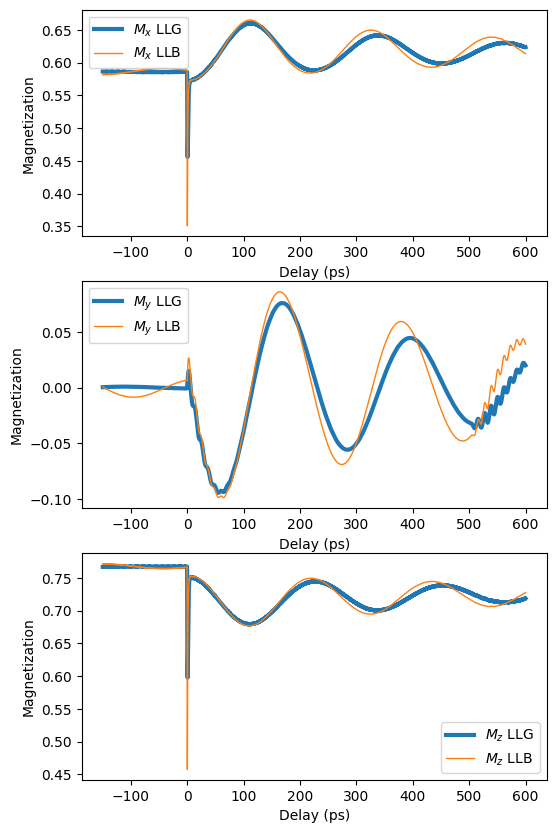

In [28]:
plt.figure(figsize=[6,10])
plt.subplot(3,1,1)
plt.plot(delays[ind_trim], np.mean(magnetization_map_xyz[:, :, 0], axis=1), label=r'$M_x$ LLG', lw =3)
plt.plot(delays[ind_trim], np.mean(magnetization_map_LLB_xyz[:, :, 0], axis=1), label=r'$M_x$ LLB', lw =1)
plt.legend()
plt.xlabel('Delay (ps)')
plt.ylabel('Magnetization')
plt.subplot(3,1,2)
plt.plot(delays[ind_trim], np.mean(magnetization_map_xyz[:, :, 1], axis=1), label=r'$M_y$ LLG', lw =3)
plt.plot(delays[ind_trim], np.mean(magnetization_map_LLB_xyz[:, :, 1], axis=1), label=r'$M_y$ LLB', lw =1)
plt.legend()
plt.xlabel('Delay (ps)')
plt.ylabel('Magnetization')
plt.subplot(3,1,3)
plt.plot(delays[ind_trim], np.mean(magnetization_map_xyz[:, :, 2], axis=1), label=r'$M_z$ LLG', lw =3)
plt.plot(delays[ind_trim], np.mean(magnetization_map_LLB_xyz[:, :, 2], axis=1), label=r'$M_z$ LLB', lw =1)
plt.legend()
plt.xlabel('Delay (ps)')
plt.ylabel('Magnetization')
plt.savefig("comparison_LLB_LLG_Ni20.png", dpi = 250)
plt.show()